In [39]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Read the file

In [3]:
df.shape

(614, 13)

The dataset contains 614 rows and 13 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We are having NULL values and have many object data type

In [5]:
df=df.drop(columns=['Loan_ID'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We dont want the loan ID column, so we are dropping the same

In [6]:
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(df['Gender'])
pd.Series(df1)
df['Gender']=df1

Using label encoder method, changing the string values to int

Like this, we are going to do for rest of the columns

In [7]:
df1=lab_enc.fit_transform(df['Married'])
pd.Series(df1)
df['Married']=df1

In [8]:
df1=lab_enc.fit_transform(df['Education'])
pd.Series(df1)
df['Education']=df1

In [9]:
df1=lab_enc.fit_transform(df['Self_Employed'])
pd.Series(df1)
df['Self_Employed']=df1

In [10]:
df1=lab_enc.fit_transform(df['Property_Area'])
pd.Series(df1)
df['Property_Area']=df1

In [11]:
df1=lab_enc.fit_transform(df['Loan_Status'])
pd.Series(df1)
df['Loan_Status']=df1

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 43.3+ KB


We changed every columns to int except dependents column

In [13]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

it has 3 + . so it shows object. so we are going to replace 3+ into 3

In [16]:
df['Dependents']=df['Dependents'].replace('3+',3)
df['Dependents']=df['Dependents'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(5), int32(6), int64(1)
memory usage: 43.3 KB


Now all are float and int

In [18]:
df.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

few columns are containing NULL values

In [27]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

By using mode method, replaced the null value in dependent and credit history column

In [28]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

For loan amount column, using mean method , because its  continuous data

In [29]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Confirming that there is no NULL values in the column now

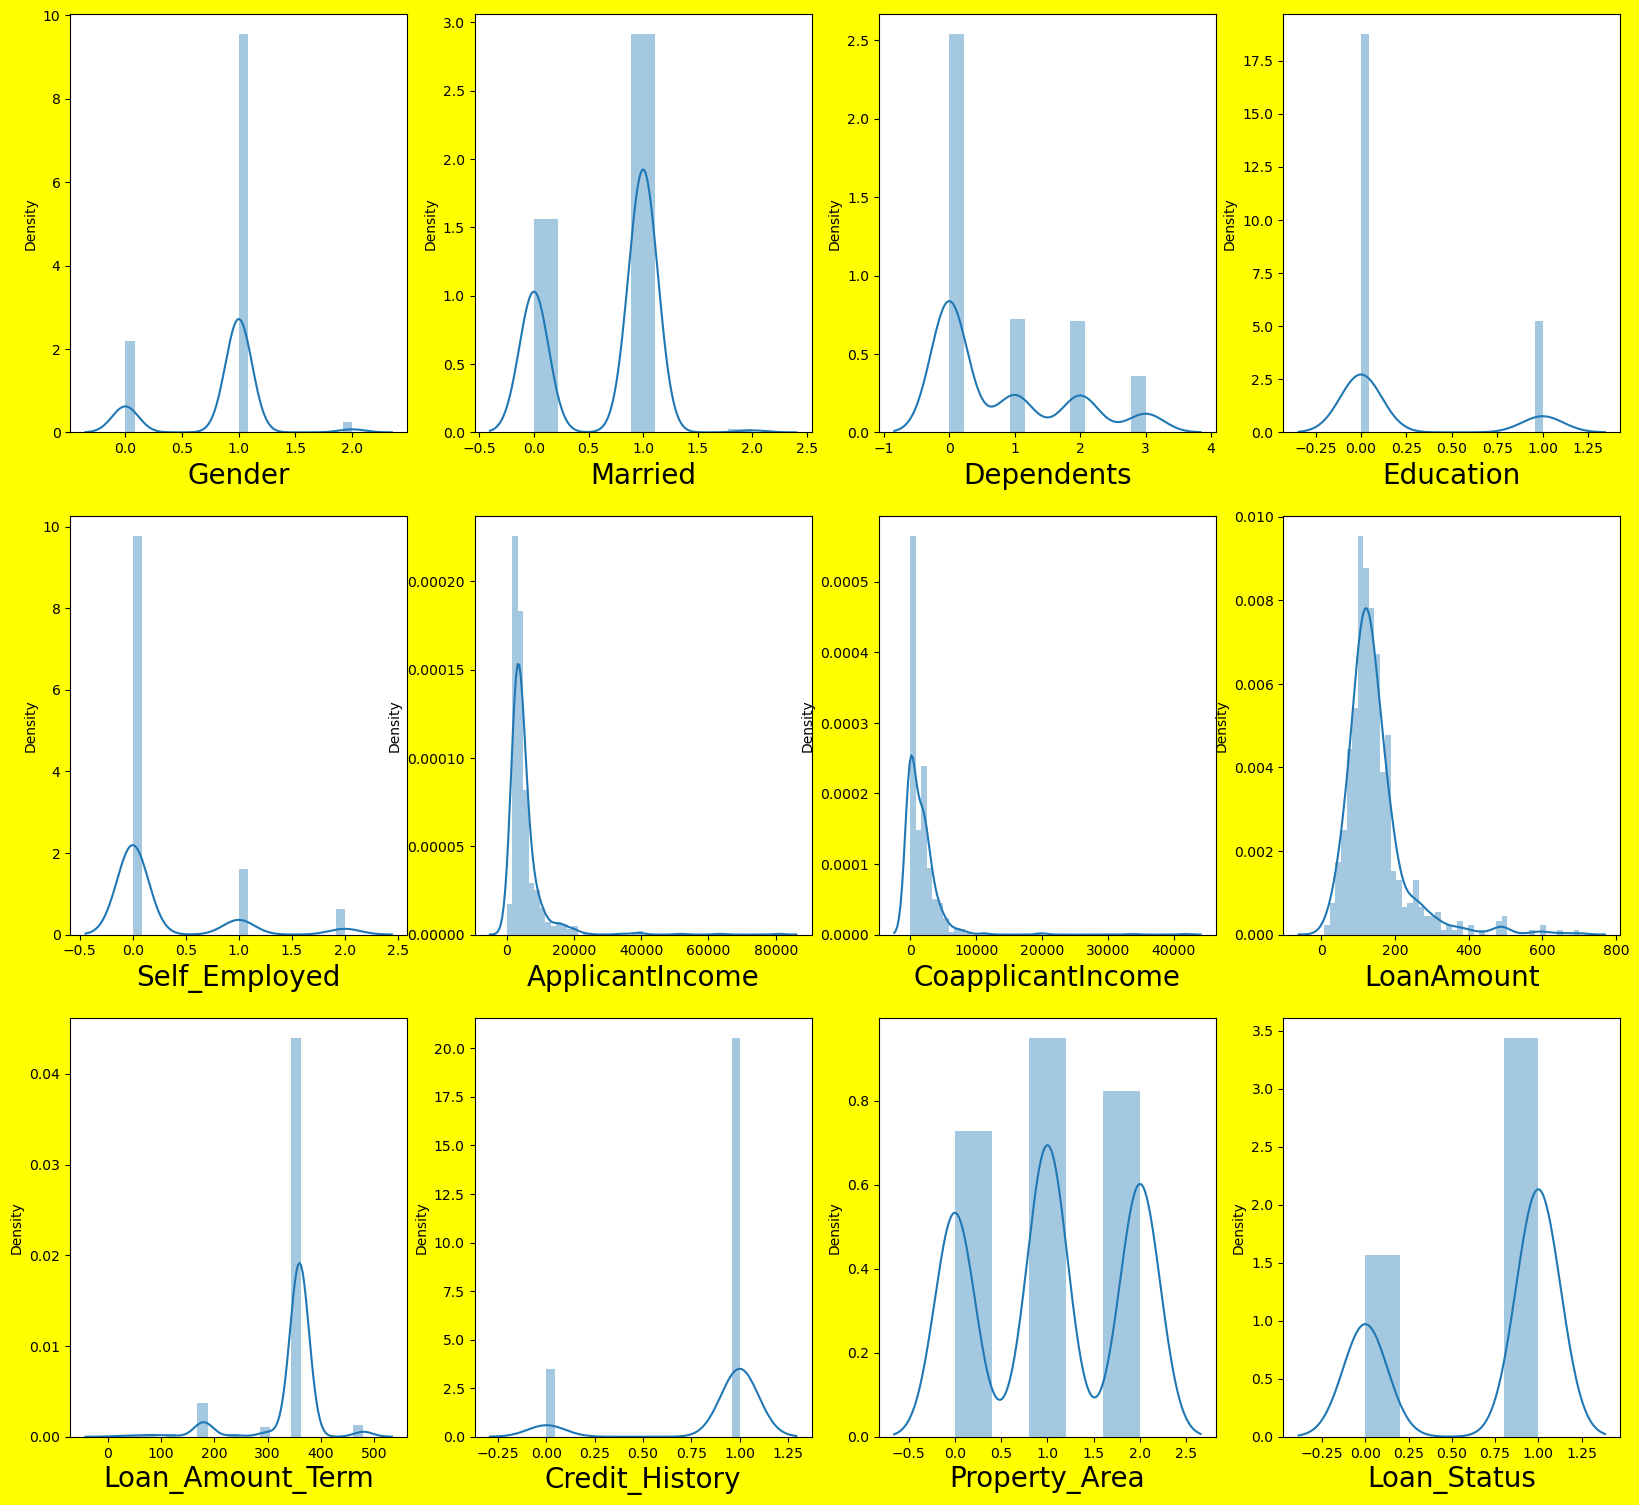

In [30]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber <=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Plotting the data in graph

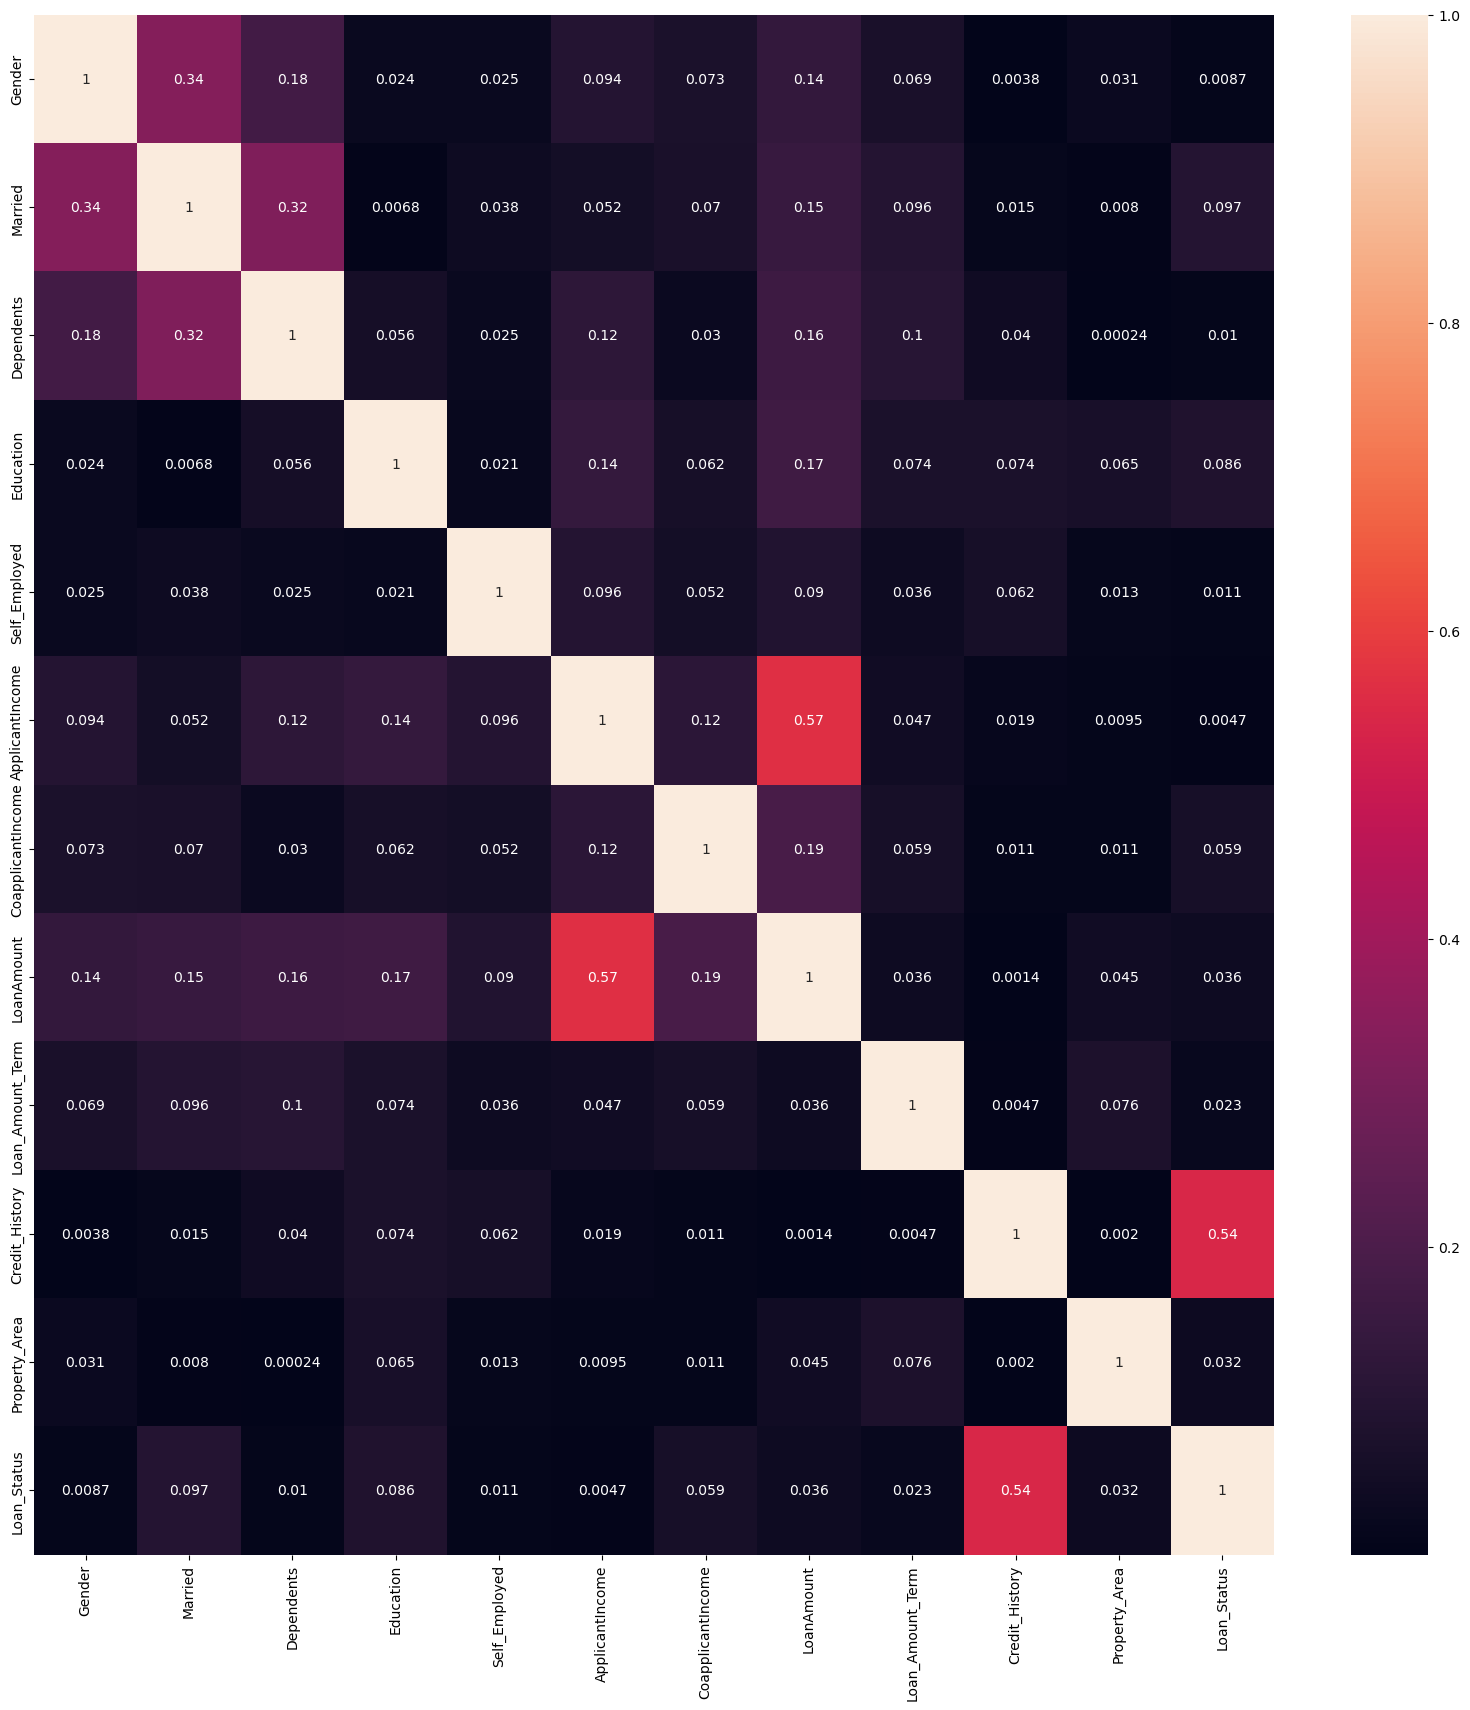

In [31]:
df_corr=df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

Checked the corelation between the columns, 

Seems there is no Multicollinearity  issue in it

In [32]:
x=df.drop(columns=['Loan_Status'])
y=df['Loan_Status']

Seperated the target and feature columns

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

Seperated the train and test data 

In [34]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n==========================Train Result=====================')
        print(f'Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('\n==========================Test Result=====================')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        
        print('\n\n Test classifiaction report\n',classification_report(y_test,pred,digits=2))

In [35]:
loan=DecisionTreeClassifier()
loan.fit(x_train,y_train)

DecisionTreeClassifier()

build the model with decision tree classifier

In [36]:
metric_score(loan,x_train,x_test,y_train,y_test,train=True)
metric_score(loan,x_train,x_test,y_train,y_test,train=False)


==========================Train Result=====================
Accuracy score:100.00%

==========================Test Result=====================
Accuracy score:62.99%


 Test classifiaction report
               precision    recall  f1-score   support

           0       0.46      0.43      0.45        53
           1       0.71      0.73      0.72       101

    accuracy                           0.63       154
   macro avg       0.59      0.58      0.58       154
weighted avg       0.62      0.63      0.63       154



We got the score 62 % nearly 

In [37]:

grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,15),
    'min_samples_leaf':range(2,6),
    'min_samples_split':range(3,8),
    'max_leaf_nodes':range(5,10)
}

In [40]:
grid_search=GridSearchCV(estimator=loan,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)

In [41]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [43]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [44]:
#initiatiate the DecisionTreeClassifier with new parameter
loan_n=DecisionTreeClassifier(criterion= 'entropy', max_depth= 10,max_leaf_nodes=5, min_samples_leaf= 5, min_samples_split= 3)

loan_n.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=5,
                       min_samples_leaf=5, min_samples_split=3)

In [45]:
metric_score(loan_n,x_train,x_test,y_train,y_test,train=True)
metric_score(loan_n,x_train,x_test,y_train,y_test,train=False)


==========================Train Result=====================
Accuracy score:82.39%

==========================Test Result=====================
Accuracy score:78.57%


 Test classifiaction report
               precision    recall  f1-score   support

           0       0.95      0.40      0.56        53
           1       0.76      0.99      0.86       101

    accuracy                           0.79       154
   macro avg       0.86      0.69      0.71       154
weighted avg       0.83      0.79      0.76       154



After tunning , we got the score 78% 